In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\raft_outdoor\\raft_3-nodes\\data.csv", sep=",")

In [4]:
raft_data_3_nodes[raft_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,18.0,388.0,54.0,17
2,1,2,17.0,389.0,54.0,17
3,2,1,17.0,1555.0,53.0,16
4,1,3,17.0,384.0,54.0,17
...,...,...,...,...,...,...
2985,3,998,17.0,0.0,61.0,16
2986,2,999,16.0,0.0,60.0,14
2987,3,999,18.0,0.0,62.0,16
2988,2,1000,16.0,0.0,60.0,14


In [5]:
paxos_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\paxos_outdoor\\paxos_3-nodes\\data.csv", sep=",")

In [6]:
noalg_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control_outdoor\\outdoor_control_3-nodes\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 693: expected 6 fields, saw 7\n'


In [7]:
raft_data_3_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2990 non-null   object 
 1   packetNumber  2988 non-null   object 
 2   temperature   2988 non-null   float64
 3   brightness    2988 non-null   float64
 4   humidity      2988 non-null   float64
 5   onBoardTemp   2987 non-null   object 
dtypes: float64(3), object(3)
memory usage: 140.3+ KB


In [8]:
raft_data_3_nodes.shape

(2990, 6)

In [9]:
paxos_data_3_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2987 non-null   object 
 1   packetNumber  2986 non-null   float64
 2   temperature   2986 non-null   float64
 3   brightness    2986 non-null   float64
 4   humidity      2986 non-null   float64
 5   onBoardTemp   2986 non-null   float64
dtypes: float64(5), object(1)
memory usage: 140.1+ KB


In [10]:
paxos_data_3_nodes.shape

(2987, 6)

In [11]:
noalg_data_3_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      2227 non-null   object
 1   packetNumber  2211 non-null   object
 2   temperature   2207 non-null   object
 3   brightness    2202 non-null   object
 4   humidity      2196 non-null   object
 5   onBoardTemp   2178 non-null   object
dtypes: object(6)
memory usage: 104.5+ KB


In [12]:
noalg_data_3_nodes.shape

(2227, 6)

In [13]:
#RAFT

In [14]:
raft_data_3_nodes[raft_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,18.0,388.0,54.0,17
2,1,2,17.0,389.0,54.0,17
3,2,1,17.0,1555.0,53.0,16
4,1,3,17.0,384.0,54.0,17
...,...,...,...,...,...,...
2985,3,998,17.0,0.0,61.0,16
2986,2,999,16.0,0.0,60.0,14
2987,3,999,18.0,0.0,62.0,16
2988,2,1000,16.0,0.0,60.0,14


In [15]:
raft_data_3_nodes_clean = raft_data_3_nodes.dropna()

In [16]:
raft_data_3_nodes_clean.shape

(2987, 6)

In [17]:
raft_data_3_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_3_nodes_clean.csv', index = False, header=True)

In [18]:
#manual cleaning of the csv req

In [19]:
clean_raft_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_3_nodes_clean.csv", sep=",")

In [20]:
clean_raft_data_3 = clean_raft_data_3_nodes.dropna()

In [21]:
final_clean_raft_3 = clean_raft_data_3.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [22]:
final_clean_raft_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985 entries, 0 to 2986
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nodeName      2985 non-null   int64
 1   packetNumber  2985 non-null   int64
 2   temperature   2985 non-null   int64
 3   brightness    2985 non-null   int64
 4   humidity      2985 non-null   int64
 5   onBoardTemp   2985 non-null   int64
dtypes: int64(6)
memory usage: 163.2 KB


In [23]:
#PAXOS

In [24]:
paxos_data_3_nodes[paxos_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,21.0,39.0,56.0,20.0
2,1,3.0,21.0,38.0,56.0,20.0
3,1,4.0,21.0,38.0,56.0,20.0
4,1,5.0,21.0,39.0,56.0,20.0
...,...,...,...,...,...,...
2982,2,1000.0,20.0,167.0,47.0,21.0
2983,3,997.0,20.0,137.0,51.0,22.0
2984,3,998.0,20.0,121.0,51.0,22.0
2985,3,999.0,20.0,121.0,51.0,22.0


In [25]:
paxos_data_3_nodes_clean = paxos_data_3_nodes.dropna()

In [26]:
paxos_data_3_nodes_clean.shape

(2986, 6)

In [27]:
paxos_data_3_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_3_nodes_clean.csv', index = False, header=True)

In [28]:
#manual cleaning of the csv req

In [29]:
clean_paxos_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_3_nodes_clean.csv", sep=",")

In [30]:
clean_paxos_data_3_nodes.shape

(2986, 6)

In [31]:
clean_paxos_data_3 = clean_paxos_data_3_nodes.dropna()

In [32]:
clean_paxos_data_3.shape

(2986, 6)

In [33]:
final_clean_paxos_3 = clean_paxos_data_3.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [34]:
#NO ALG

In [35]:
noalg_data_3_nodes[noalg_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1,21,65535,50,20
2,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2,21,65535,50,20
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2222,5,996,17,65535,56,18
2223,5,997,17,1533,56,18
2224,5,998,16,65535,56,18
2225,5,999,17,1525,56,18


In [36]:
noalg_data_3_nodes_clean = noalg_data_3_nodes.dropna()

In [37]:
noalg_data_3_nodes_clean.shape

(2178, 6)

In [38]:
noalg_data_3_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_3_nodes_clean.csv', index = False, header=True)

In [39]:
#manual cleaning of the csv req

In [40]:
clean_noalg_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_3_nodes_clean.csv", sep=",")

In [41]:
clean_noalg_data_3_nodes.shape

(2178, 6)

In [42]:
clean_noalg_data_3 = clean_noalg_data_3_nodes.dropna()

In [43]:
clean_noalg_data_3.shape

(2162, 6)

In [44]:
final_clean_noalg_3 = clean_noalg_data_3.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [68]:
df = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithm'], 
               'goodPacketsReceived': [len(final_clean_raft_3), len(final_clean_paxos_3), len(final_clean_noalg_3)], 
               'totalPacketsReceived': [len(raft_data_3_nodes), len(paxos_data_3_nodes), len(noalg_data_3_nodes)], 
               'packetsExpected': [3000, 3000, 3000]}

all_3_nodes = pd.DataFrame(df)

In [69]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['font.family'] = "serif"

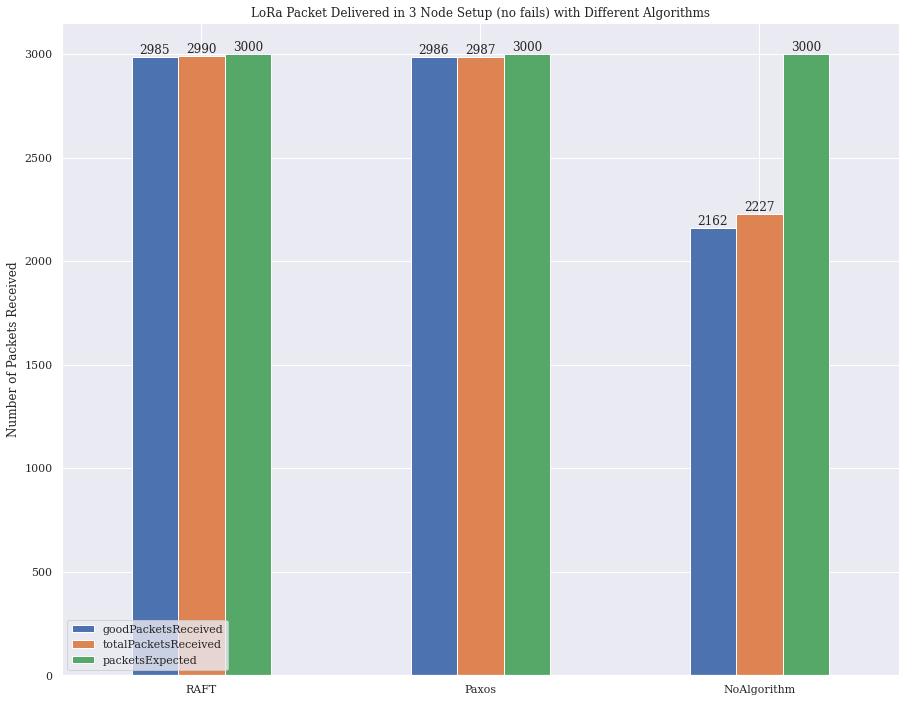

In [70]:
ax = all_3_nodes.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 3 Node Setup (no fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Received')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes.png', bbox_inches='tight')

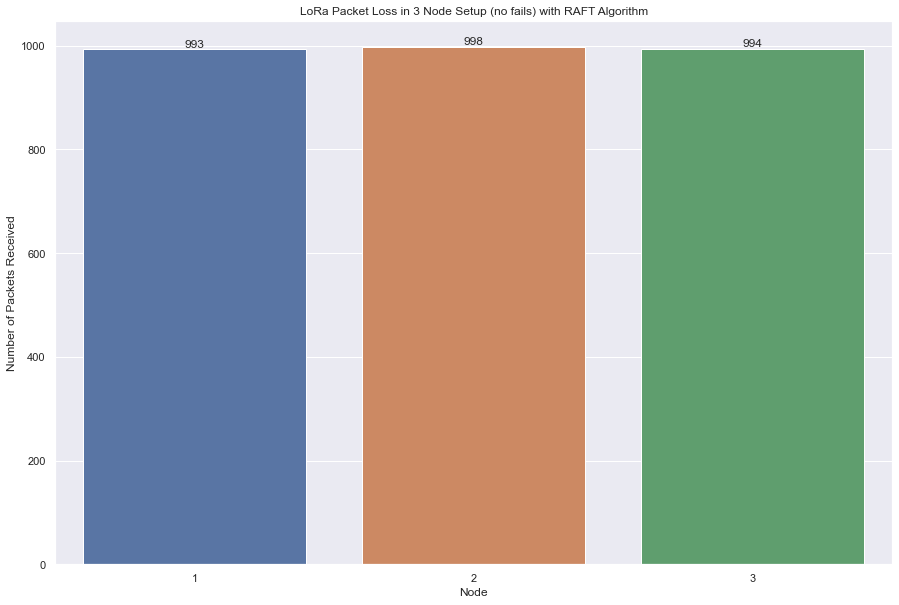

In [71]:
#LoRa Packet Loss in 3 Node Setup (no fails) with RAFT Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_raft_3)
plt.title('LoRa Packet Loss in 3 Node Setup (no fails) with RAFT Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_RAFT.png', bbox_inches='tight')

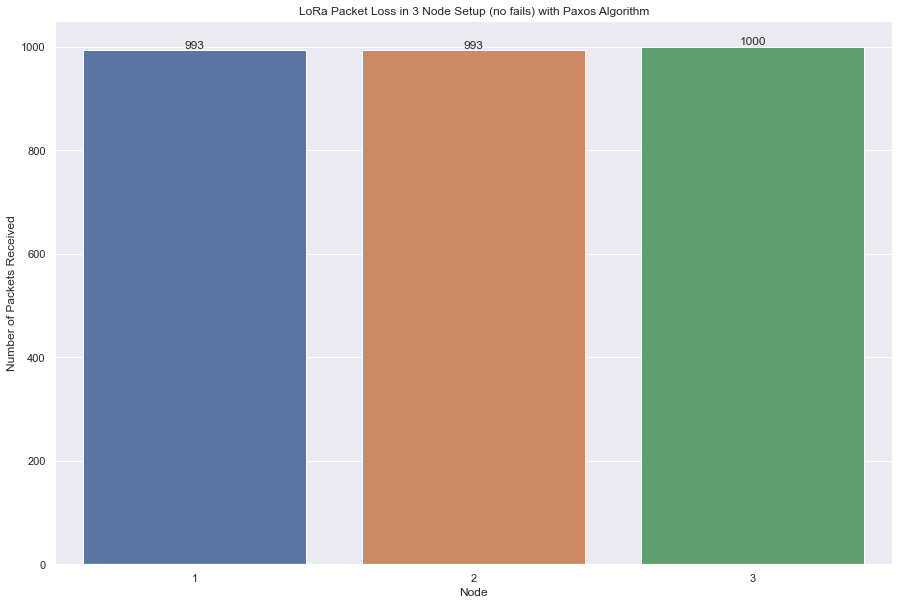

In [72]:
#LoRa Packet Loss in 3 Node Setup (no fails) with Paxos Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_paxos_3)
plt.title('LoRa Packet Loss in 3 Node Setup (no fails) with Paxos Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_Paxos.png', bbox_inches='tight')

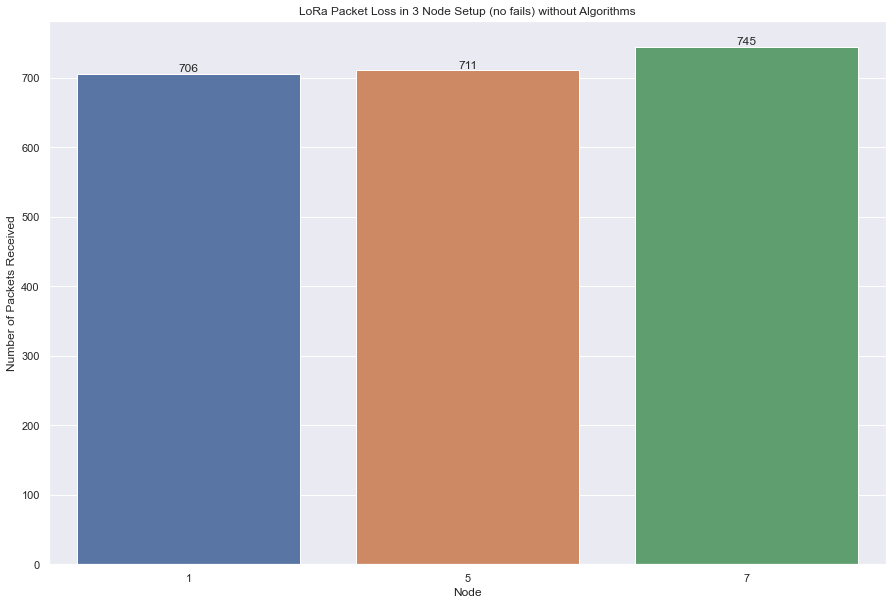

In [73]:
#LoRa Packet Loss in 3 Node Setup (no fails) without Algorithms
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_noalg_3)
plt.title('LoRa Packet Loss in 3 Node Setup (no fails) without Algorithms')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_noAlg_outdoor.png', bbox_inches='tight')

In [51]:
#no alg indoor

In [52]:
indoor_noalg_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control\\8_control_3-nodes\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 300: expected 6 fields, saw 7\nSkipping line 385: expected 6 fields, saw 7\n'


In [53]:
indoor_noalg_data_3_nodes[indoor_noalg_data_3_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,21,45,49,21
3,3,2,21,65,49,21
4,3,3,21,38,49,21
...,...,...,...,...,...,...
1921,2,996,22,117,38,26
1922,2,997,22,103,38,26
1923,2,998,22,138,38,26
1924,2,999,22,95,39,26


In [54]:
indoor_noalg_data_3_nodes_clean = indoor_noalg_data_3_nodes.dropna()

In [55]:
indoor_noalg_data_3_nodes_clean.shape

(1885, 6)

In [56]:
indoor_noalg_data_3_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_3_nodes_clean.csv', index = False, header=True)

In [57]:
#manual cleaning of the csv req

In [58]:
clean_indoor_noalg_data_3_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_3_nodes_clean.csv", sep=",")

In [59]:
clean_indoor_noalg_data_3_nodes.shape

(1885, 6)

In [60]:
clean_indoor_noalg_data_3 = clean_indoor_noalg_data_3_nodes.dropna()

In [61]:
clean_indoor_noalg_data_3.shape

(1879, 6)

In [63]:
final_indoor_clean_noalg_3 = clean_indoor_noalg_data_3.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [74]:
df1 = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithmOutdoor', 'NoAlgorithmIndoor'], 
               'goodPacketsReceived': [len(final_clean_raft_3), len(final_clean_paxos_3), len(final_clean_noalg_3),len(final_indoor_clean_noalg_3)], 
               'totalPacketsReceived': [len(raft_data_3_nodes), len(paxos_data_3_nodes), len(noalg_data_3_nodes),len(indoor_noalg_data_3_nodes)], 
               'packetsExpected': [3000, 3000, 3000,3000]}

all_3_nodes_indoor = pd.DataFrame(df1)

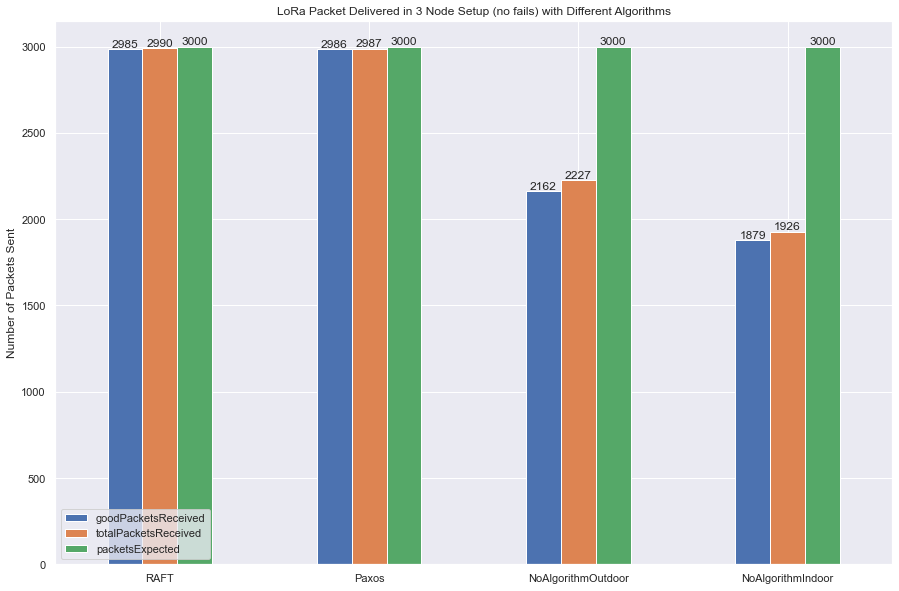

In [75]:
ax = all_3_nodes_indoor.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 3 Node Setup (no fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Sent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_indoor.png', bbox_inches='tight')

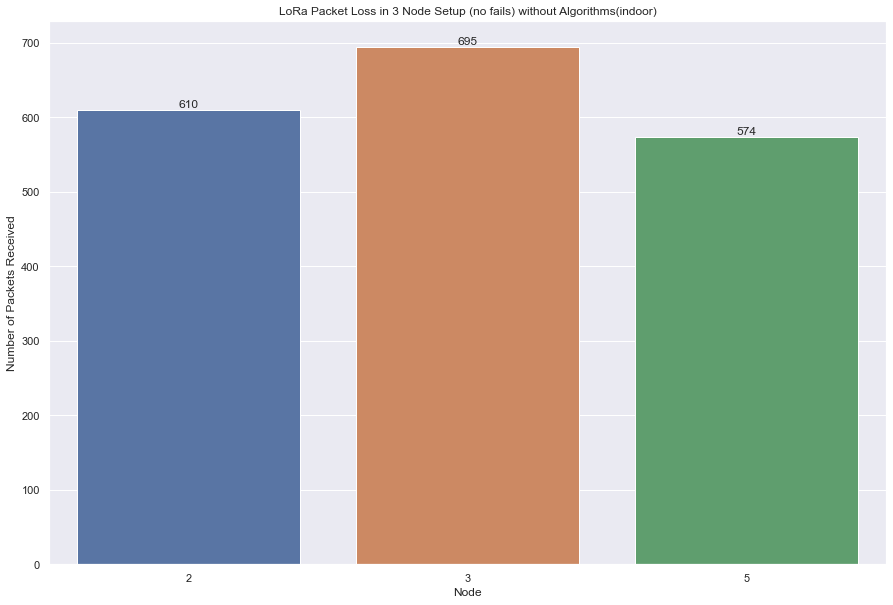

In [76]:
#LoRa Packet Loss in 3 Node Setup (no fails) without Algorithms INDOOR
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_indoor_clean_noalg_3)
plt.title('LoRa Packet Loss in 3 Node Setup (no fails) without Algorithms(indoor)')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\3_nodes_noAlg_indoor.png', bbox_inches='tight')